# The evolution of house prices and GDP growth in Denmark

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

In [453]:
#importing and setting magics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import ipywidgets as widgets
from ipywidgets import interact, Dropdown
from IPython.display import display
from matplotlib_venn import venn2 
plt.style.use('seaborn-whitegrid')

# import pydst
# dst = pydst.Dst(lang='en')

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading and cleaning data for GDP in Denmark from 2012-2022

The data for is downloaded from "Danmarks Statistik": NAN1 for GDP and EJ66 for HPI. 

In [454]:
#Loading data for GDP
df_gdp = pd.read_excel('GDP.xlsx', skiprows=2)

df_gdp.head()

,Unnamed: 0,Unnamed: 1,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,"Løbende priser, (mia. kr.)",1895.0,1929.7,1981.2,2036.4,2107.8,2193.0,2253.3,2311.0,2323.9,2504.2,2797.9
1,NaN,"2010-priser, kædede værdier, (mia. kr.)",1839.3,1856.5,1886.5,1930.7,1993.4,2049.6,2090.4,2121.6,2079.3,2180.3,2263.5
2,NaN,Realvækst i forhold til foregående periode (pct.),0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8
3,NaN,"Pr. indbygger, løbende priser, (1000 kr.)",339.0,343.8,351.1,358.4,367.9,380.4,388.9,397.3,398.6,427.7,473.7
4,NaN,"Bidrag til realvækst i BNP, (procentpoint)",0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8


In this project, I am only interested in examining real GDP growth. In addition to cleaning up the data set and giving titles, I remove all other rows that I will not use in this examination. 



In [455]:
#Cleaning data for GDP

#Removing the "Unnamed: 0" column since it's not used
del df_gdp['Unnamed: 0']

#Removing the column name "Unnamed: 1":
df_gdp.rename(columns={'Unnamed: 1': ''}, inplace=True)

#Only keeping the GDP growth values
I = df_gdp[''] == 'Realvækst i forhold til foregående periode (pct.)'
df_gdp = df_gdp[I]

#Dropping missing values
df_gdp = df_gdp.dropna()


df_gdp.head()


,,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Realvækst i forhold til foregående periode (pct.),0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8


I now make a line plot of the GDP growth in Denmark

In [456]:
#Setting the index of the dataframe to the "GDP unit" column:
df_gdp.set_index('', inplace=True)


#Transposing so that the years become the index and the columns become the rows:
df_gdp = df_gdp.transpose()

#Renaming the GDP unit
df_gdp.rename(columns={'Realvækst i forhold til foregående periode (pct.)': 'GDP Growth Rate'}, inplace=True)

df_gdp.head()

,GDP Growth Rate
2012,0.2
2013,0.9
2014,1.6
2015,2.3
2016,3.2


## Interactive plot GDP

In the following section I make an interactive line plot using Plotly. This makes it possible for you to hover over the data points and view the exact GDP growth rate for each year.

In [457]:

#Creating a Plotly figure
fig = go.Figure()

#Using a "line trace"
#The x value returns the years from the dataframe
#The y value returns the growth rate from the dataframe

fig.add_trace(go.Scatter(x=df_gdp.index, y=df_gdp['GDP Growth Rate'], mode='lines+markers'))

#Giving a title and setting axis labels
fig.update_layout(
    title='Figure 1: Real GDP growth in Denmark from 2012 to 2022',
    xaxis_title='Year',
    yaxis_title='GDP Growth Rate (pct.)'
)

#Showing the interactive figure
fig.show()


# Loading and cleaning data for the House Price Index (HPI) in Denmark from 2012-2022

In [458]:
#Loading data for House Price Index (HPI)
df_hpi = pd.read_excel('HPI.xlsx',  skiprows=2)
df_hpi.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Enfamiliehuse,Indeks,Hele landet,85.1,87.4,90.4,95.8,99.6,103.6,107.6,110.8,116.1,128.2,129.2
1,NaN,Indeks,Landsdel Byen København,79.5,85.7,93.3,101.5,109.4,115.4,122.6,125.4,134.2,152.3,158.6
2,NaN,Indeks,Landsdel Københavns omegn,77.6,83.1,88.0,95.1,101.8,107.3,112.3,116.5,124.1,143.3,145.1
3,NaN,Indeks,Landsdel Nordsjælland,72.1,74.2,76.3,82.8,86.2,90.5,95.2,98.7,104.4,121.0,125.6
4,NaN,Indeks,Landsdel Bornholm,84.7,82.9,82.0,84.0,91.6,101.1,107.1,111.1,122.0,143.1,143.4


Again, I am only interested in examining real growth in HPI. So I remove all other rows that I will not use in this examination. 

In [459]:
#Cleaning data for HPI

#Giving a column title for the regions in DK:
df_hpi.rename(columns={'Unnamed: 2': 'Region'}, inplace=True)

#Giving a column title for the units of HPI:
df_hpi.rename(columns={'Unnamed: 1': 'HPI unit'}, inplace=True)

#Removing the columns that is not used
del df_hpi['Unnamed: 0']

#Only keeping the HPI growth values instead of the index
I = df_hpi['HPI unit'] == 'Ændring i forhold til året før (pct.)'
df_hpi = df_hpi[I]

df_hpi.head()


,HPI unit,Region,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,Ændring i forhold til året før (pct.),Hele landet,-3.4,2.7,3.4,6.0,4.0,4.0,3.9,3.0,4.8,10.4,0.8
13,Ændring i forhold til året før (pct.),Landsdel Byen København,-2.5,7.8,8.9,8.8,7.8,5.5,6.2,2.3,7.0,13.5,4.1
14,Ændring i forhold til året før (pct.),Landsdel Københavns omegn,-3.8,7.1,5.9,8.1,7.0,5.4,4.7,3.7,6.5,15.5,1.3
15,Ændring i forhold til året før (pct.),Landsdel Nordsjælland,-3.5,2.9,2.8,8.5,4.1,5.0,5.2,3.7,5.8,15.9,3.8
16,Ændring i forhold til året før (pct.),Landsdel Bornholm,-4.4,-2.1,-1.1,2.4,9.0,10.4,5.9,3.7,9.8,17.3,0.2


## Interactive plot HPI


I will now make an interactive plot, where you can choose which region (Landsdel) of Denmark you want to see the HPI growth rate for.

I start by cleaning up the dataframe further, so the first column that shows HPI unit is removed:

In [460]:
#Dropping the column 'HPI unit' from the df_hpi 
#creating a new dataframe called df_hpi_i to use for an interactive plot
df_hpi_i = df_hpi.drop('HPI unit', axis=1)
df_hpi_i = df_hpi_i.reset_index()

df_hpi_i = df_hpi_i.drop('index', axis=1)

#Printing the updated dataframe df_hpi_i
df_hpi_i.head()


,Region,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Hele landet,-3.4,2.7,3.4,6.0,4.0,4.0,3.9,3.0,4.8,10.4,0.8
1,Landsdel Byen København,-2.5,7.8,8.9,8.8,7.8,5.5,6.2,2.3,7.0,13.5,4.1
2,Landsdel Københavns omegn,-3.8,7.1,5.9,8.1,7.0,5.4,4.7,3.7,6.5,15.5,1.3
3,Landsdel Nordsjælland,-3.5,2.9,2.8,8.5,4.1,5.0,5.2,3.7,5.8,15.9,3.8
4,Landsdel Bornholm,-4.4,-2.1,-1.1,2.4,9.0,10.4,5.9,3.7,9.8,17.3,0.2


In [461]:
#Making the interactive plot 

#Defining a function that plots the HPI growth rate for a arbitrary region over time
def plot_hpi(Region):

    #Plotting the line plot:
    #The x value extracts the column labels representing the years (i.e., 2012 to 2022)
    #The y value extracts the HPI growth rate values for the specified region as a numpy array

    plt.plot(df_hpi_i.columns[1:], df_hpi_i.loc[df_hpi_i['Region'] == Region].values[0][1:], linestyle='-', color='Blue')

    #Using a f string so that the name of the region changes when choosing from the drop down menu
    plt.title(f'HPI Growth Rate for {Region}')

    #Setting the axis labels
    plt.xlabel('Year')
    plt.ylabel('HPI Growth Rate (pct.)')

    #Showing the line plot
    plt.show()


#Creating an interactive widget to select a region
interact(plot_hpi, Region=df_hpi_i['Region'].unique())


interactive(children=(Dropdown(description='Region', options=('Hele landet', 'Landsdel Byen København', 'Lands…

<function __main__.plot_hpi(Region)>

Since I'm only interested in examining the HPI across the country as a whole, I remove the other rows, that shows the HPI for teh different regions (landsdele) in Denmark.

In [462]:
#Only keeping the HPI growth values for the whole country (Hele landet)
I = df_hpi['Region'] == 'Hele landet'
df_hpi = df_hpi[I]

df_hpi.head()

,HPI unit,Region,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,Ændring i forhold til året før (pct.),Hele landet,-3.4,2.7,3.4,6.0,4.0,4.0,3.9,3.0,4.8,10.4,0.8


Then I transpose the data for HPI, such that the years are rows insted of columns, and the values for HPI is listed in one column.

In [463]:
#Transposing the data
df_hpi_transposed = df_hpi.transpose()

#Showing the transposed dataframe
print(df_hpi_transposed)

                                             12
HPI unit  Ændring i forhold til året før (pct.)
Region                              Hele landet
2012                                       -3.4
2013                                        2.7
2014                                        3.4
2015                                        6.0
2016                                        4.0
2017                                        4.0
2018                                        3.9
2019                                        3.0
2020                                        4.8
2021                                       10.4
2022                                        0.8



Creating a line plot of the Real Growth in HPI

In [464]:
#Creating lists to create a line plot
#x-axis
years_HPI = []

for year in range(2012, 2023):
    years_HPI.append(year)

#y-axis
HPI_growth = [-3.4, 2.7, 3.4, 6.0, 4.0, 4.0, 3.9, 3.0, 4.8, 10.4, 0.8]

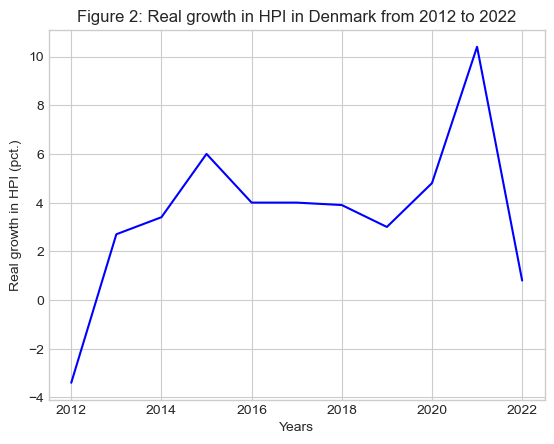

In [465]:
# creating a line plot
plt.plot(years_HPI, HPI_growth, linestyle='-', color='Blue') 
plt.xlabel('Years') 
plt.ylabel('Real growth in HPI (pct.)') 
plt.title('Figure 2: Real growth in HPI in Denmark from 2012 to 2022') 
plt.show() 

## Analysis

Now I want to examine the relationship between the HPI and GDP in Denmark. 

Starting off, I make a line plot, that shows both the GDP and HPI against each other, to see if there is any relationship between the two growth rates.

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [466]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

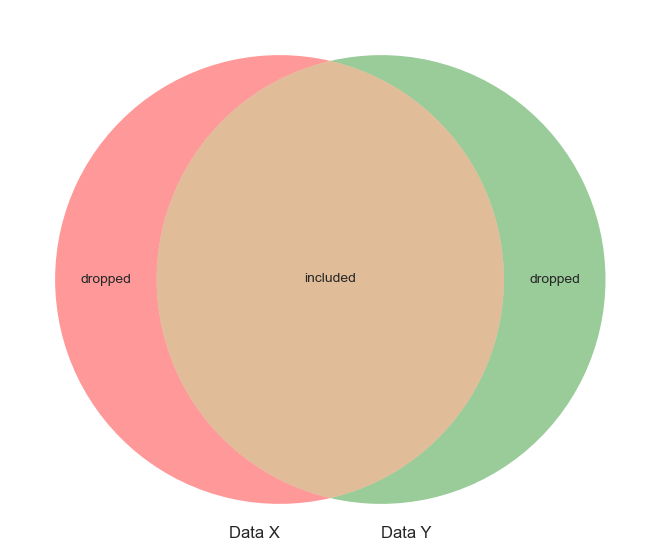

In [467]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION. 